In [12]:
# -------- code outline ------- #
# This code starts with a function to remove the noise from the signal. Then there's a loop that 
# reads in each file, performs the noise removal, then saves the noise removed signal as a pickle file

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import pywt 
import scipy
from scipy import signal

In [27]:
#  De-noise both leads of the ecg signal then put it back into one array

# -------- Noise Filtering -------- #
# This is the function that performs the noise removal of the signal
def DWT(signal, thresh, wavelet="db4",num_leads = 2):
    # Make an empty array for the final de noised signal
    de_noised = np.zeros_like(signal)
    
    # Loop over the number of leads, filter each one then put into de_noised array
    for j in range(num_leads):
        # This performs the de-noising
        threshold = thresh*np.nanmax(signal[:,j])
        coeff = pywt.wavedec(signal[:,j], wavelet, mode="smooth")
        coeff[14:] = (pywt.threshold(i, value=threshold, mode="soft" ) for i in coeff[14:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="smooth" )
        
        de_noised[:,j] = reconstructed_signal
    
    
    return de_noised

In [28]:
# Need to loop over every patient and put the de-noised data into the de-noised folder
# Easiest by looping over the list of names 

names = [100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,
        124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,
        231,232,233,234]
import os
cwd = os.getcwd()
print(cwd)

# Read in raw ECG arrays one by one
for i,name in enumerate(names):
    with open('Data Extraction/adb arrays/{}_array.pkl'.format(i),'rb') as f:
        data = pickle.load(f)
        
    # Perform denoising
    denoised = DWT(data,thresh=0.005,wavelet="db4",num_leads=2)
    
    # Save denoised data
    with open('De-Noised Data/adb de-noised/{}_de-noised.pkl'.format(i), 'wb') as f:
        pickle.dump(denoised, f)
    print('denoised patient ',i)
    

/Users/olivermills/Data Pre-Processing
denoised patient  0
denoised patient  1
denoised patient  2
denoised patient  3
denoised patient  4
denoised patient  5
denoised patient  6
denoised patient  7
denoised patient  8
denoised patient  9
denoised patient  10
denoised patient  11
denoised patient  12
denoised patient  13
denoised patient  14
denoised patient  15
denoised patient  16
denoised patient  17
denoised patient  18
denoised patient  19
denoised patient  20
denoised patient  21
denoised patient  22
denoised patient  23
denoised patient  24
denoised patient  25
denoised patient  26
denoised patient  27
denoised patient  28
denoised patient  29
denoised patient  30
denoised patient  31
denoised patient  32
denoised patient  33
denoised patient  34
denoised patient  35
denoised patient  36
denoised patient  37
denoised patient  38
denoised patient  39
denoised patient  40
denoised patient  41
denoised patient  42
denoised patient  43
denoised patient  44
denoised patient  45
denoi

In [ ]:
# Cells below are just testing stuff, plotting before and after

In [29]:
with open('Data Extraction/adb arrays/31_array.pkl','rb') as f:
    test = pickle.load(f)

In [30]:
new_data= DWT(test, thresh = 0.005, wavelet="db4", num_leads = 2)

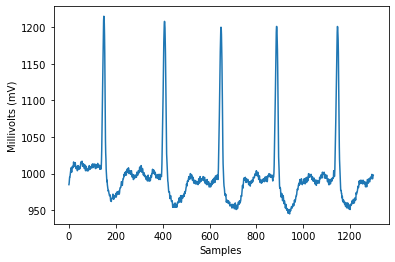

In [47]:
plt.plot(test[2100:3400,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('Raw ECG 5 beat')

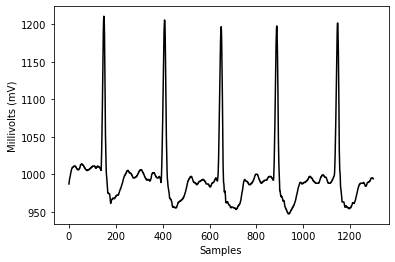

In [48]:
plt.plot(new_data[2100:3400,0], 'black')
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('ecg to show segmenting.pdf')